# Comparison between AE and VAE

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [12]:
def color_from_label(labels):
    l2c = {0:'tab:blue',
           1:'tab:orange',
           2:'tab:green',
           3:'tab:red',
           4:'tab:purple',
          }
    return [l2c[label] for label in labels]

def single_view(ax, z, y, text):

    pca = PCA(n_components=2)
    z_pca = pca.fit_transform(z)
    label_from_y = {0: 'Normalfälle', 3: "Anomalien"}
    for l in np.unique(y):
        idx = y==l
        ax.scatter(z_pca[idx,0], z_pca[idx,1], s=20, c=color_from_label(y[idx]), alpha=0.6, label=label_from_y[l])
    ax.set_xlabel(r'$z_1$ [-]', fontsize=14)
    ax.set_ylabel(r'$z_2$ [-]', fontsize=14)
    ax.text(0.5, 1.05, text, transform=ax.transAxes, horizontalalignment='center', size=16)

In [13]:
# Read the data
z_ae = np.loadtxt('../dumps/latent_z.csv')
z_vae = np.loadtxt('../dumps/latent_vae_z.csv')
y = np.loadtxt('../dumps/latent_y.csv')

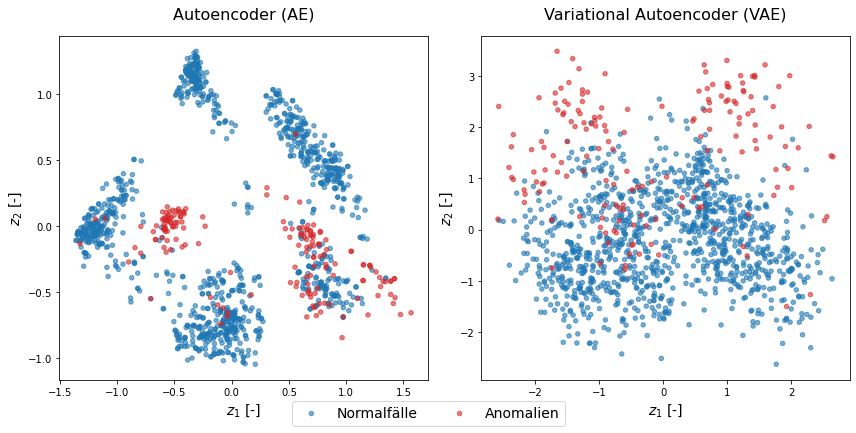

In [17]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

single_view(axs[0], z_ae, y, "Autoencoder (AE)")
single_view(axs[1], z_vae, y, "Variational Autoencoder (VAE)")
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, loc='lower center', bbox_to_anchor=(0.5, -0.01), fontsize=14)
fig.tight_layout()

fig.savefig('vae-ae.pdf')